<a href="https://colab.research.google.com/github/Sn1ggle/ML2/blob/main/emnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network on MNIST with Keras&Tensorflow



In this Notebook you will start playing with the "Hello World" of Nueral Networks: The MNIST Dataset. And we will expand from there.

### 1. Classification of hand-written digits

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.18.0'

In [4]:
(ds_train, ds_test), ds_info = tfds.load('emnist/letters',split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

# Convert to numpy arrays
def prepare_dataset(dataset):
    images = []
    labels = []
    for image, label in dataset:
        # Labels in EMNIST are 1-indexed (1-26), subtract 1 to make 0-indexed
        images.append(image.numpy())
        labels.append(label.numpy() - 1)  # Convert to 0-25 range

    return np.array(images), np.array(labels)

# Get training and test data
train_images, train_labels = prepare_dataset(ds_train)
test_images, test_labels = prepare_dataset(ds_test)

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Create a letter map for easier visualization (A-Z)
letters = [chr(ord('A') + i) for i in range(26)]

print('Training set shape:', train_images.shape)
print('Test set shape:', test_images.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.ICVPSU_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.ICVPSU_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
Training set shape: (88800, 28, 28, 1)
Test set shape: (14800, 28, 28, 1)


In [5]:
print(f'Number of Training Examples: {len(train_images)}')
print(f'Number of Test Examples: {len(test_images)}')
print(f'Image Shape {train_images[0].shape}')
print(f'Number of classes: {len(np.unique(train_labels))}')

Number of Training Examples: 88800
Number of Test Examples: 14800
Image Shape (28, 28, 1)
Number of classes: 26


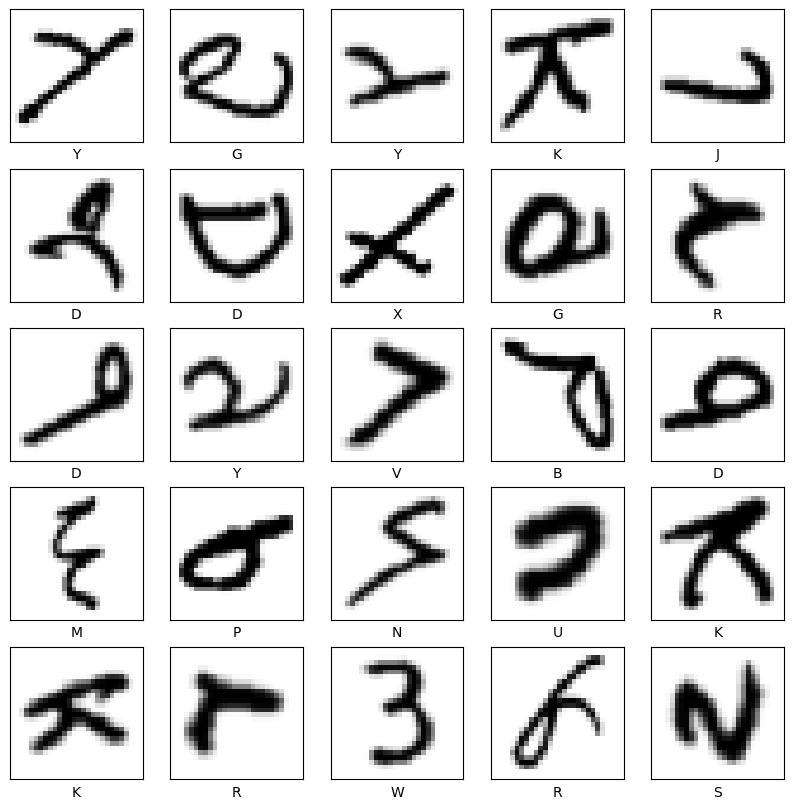

In [6]:
# Display first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(letters[train_labels[i]])
plt.show()

### Create and train the model
Implement an ANN with 2 Hidden Layers, the first with 128 neurons and "relu" activation functions. The second layers instead contains 64 neurons (also relu activation function).
Don't forget the output layer :)

Also, remember that due to the 2D structure of your input data you need to first flatten them. Use the following specific layer at the very beginning inside your Sequential Model:


tf.keras.layers.Flatten(input_shape=(28, 28))

Notabene: you don't need to provide the input_dim in the first Dense layer, if you start with a Flatten layer.

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),#my figures have size 28 pixels x 28 pixels # Flatten is needed for img
  tf.keras.layers.Dense(128, activation="relu"), # Dense produces a fully connected layer. #w/o Flatten, the input is given here
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(26, activation="softmax")#we use softmax because we are dealing with a multi-class classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10,
                  validation_split=0.1)

Epoch 1/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6509 - loss: 1.1954 - val_accuracy: 0.8334 - val_loss: 0.5307
Epoch 2/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8550 - loss: 0.4686 - val_accuracy: 0.8606 - val_loss: 0.4444
Epoch 3/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8830 - loss: 0.3657 - val_accuracy: 0.8714 - val_loss: 0.4199
Epoch 4/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8954 - loss: 0.3211 - val_accuracy: 0.8801 - val_loss: 0.3900
Epoch 5/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9055 - loss: 0.2832 - val_accuracy: 0.8769 - val_loss: 0.3978
Epoch 6/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9135 - loss: 0.2574 - val_accuracy: 0.8877 - val_loss: 0.3747
Epoch 7/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9190 - loss: 0.2377 - val_accuracy: 0.8827 - val_loss: 0.4071
Epoch 8/10
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9222 - loss: 0

In [20]:
my_model = model.save(filepath='/content/my_model.keras')
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

463/463 - 1s - 3ms/step - accuracy: 0.8780 - loss: 0.4022


###Prediction

### Experimental test

The final test consist in a "physical" test.
1) Draw on a piece of paper 1 single digit between 0 and 9.
2) Take a picture with your webcam of it
3) Test if the neural network can correctly identify also your handwriting


To do that you need to preprocess first your image and put it in the right format, by using the Keras function 'load_img'
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img
ATTENTION: your image need to be resized in the same size that you used for training.... And pay attention to RGB images and grayscale!

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/CF1ze.jpg', color_mode='grayscale', target_size=(28,28)) #ADD YOUR CODE

img_array = 1- tf.keras.preprocessing.image.img_to_array(img) / 255.0
background = img_array < 0.5
img_array[background] = 0.0
img_array = tf.expand_dims(img_array, 0) # Create a batch

Now you can simply predict the class of your image, as done just before for the MNIST test images.


In [ ]:
predictions = model(img_array, training = False)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(np.argmax(predictions,axis=1), 100 * np.max(score))
)
print(score)

This image most likely belongs to [6] with a 18.57 percent confidence.
tf.Tensor(
[0.09202897 0.08939087 0.08843064 0.08785127 0.08785161 0.1047096
 0.18569781 0.08786889 0.08831953 0.08785083], shape=(10,), dtype=float32)


Is the result correct?

### Plot the evolution of accuracy and loss
The historical values of accuracy and loss during training and validation are stored during training in the variable "history".
You can access them through history.history.
Use this information to plot and compare the evolution of accuracy and loss for training and validation. What can you learn from this?

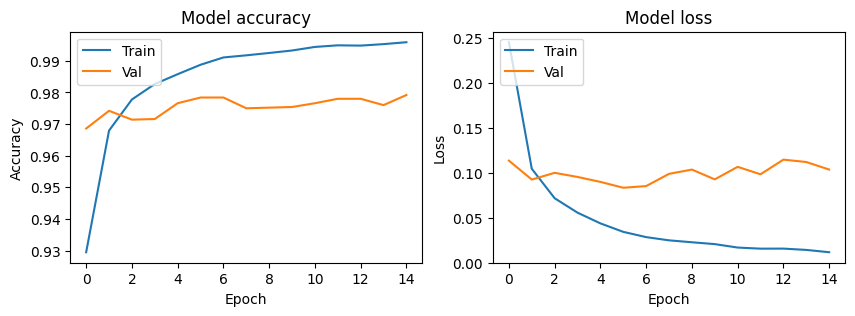

In [ ]:
plt.figure(figsize=(10,3))
# Plot training & validation accuracy values
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()